New clusters: {2: [array([ 2, 10]), array([5, 8]), array([4, 9])], 0: [array([2, 5]), array([1, 2])], 1: [array([8, 4]), array([7, 5]), array([6, 4])]}
Centers: [[3.66666667 9.        ]
 [1.5        3.5       ]
 [7.         4.33333333]]


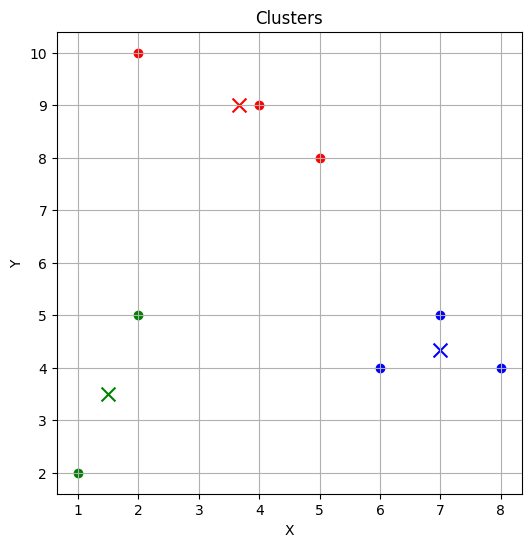

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Dataset
data = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Initialize centers using inital seeds
centers = np.array([[2, 5], [8, 4], [4, 9]])

# Euclidean distance
def distance(p1, p2):
  return np.sqrt(np.sum((p1-p2)**2))

def assign(data, centers):
    clusters = {}
    for point in data:
        minimum = float('inf')
        closest_center = None
        for i, center in enumerate(centers):
            d = distance(point, center)
            if d < minimum:
                minimum = d
                closest_center = i
        if closest_center in clusters:
            clusters[closest_center].append(point)
        else:
            clusters[closest_center] = [point]
    return clusters

def update_centers(clusters):
    new_centers = []
    for key in clusters:
        new_center = np.mean(clusters[key], axis=0)
        new_centers.append(new_center)
    return np.array(new_centers)

def plot(data, clusters, centers):
    plt.figure(figsize=(6, 6))
    colors = ['r', 'g', 'b']
    for i, key in enumerate(clusters):
        for point in clusters[key]:
            plt.scatter(point[0], point[1], color=colors[i], marker='o')
    for i, center in enumerate(centers):
        plt.scatter(center[0], center[1], color=colors[i], marker='x', s=100)
    plt.title('Clusters')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

clusters = assign(data, centers)
new_centers = update_centers(clusters)
epochs = 1

print(f"New clusters: {clusters}")
print(f"Centers: {new_centers}")
plot(data, clusters, new_centers)

Here the new clusters after one epoch can be seen which each color representing a cluster. The new clusters are also printed above.

The centers of the new clusters are indicated by the X's. The coordinates of the new centers after the first epoch are also printed above.

Epoch 2 completed.


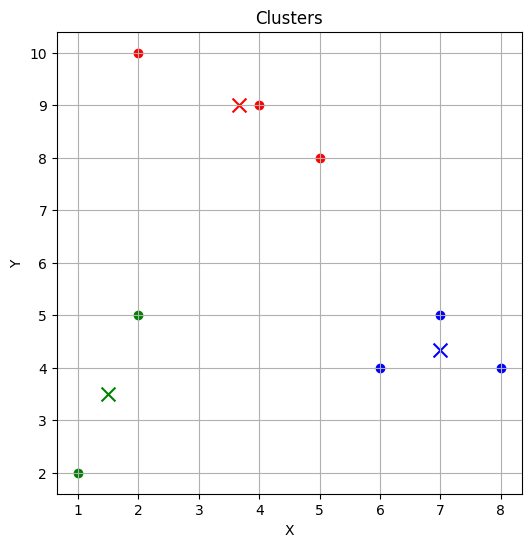

In [ ]:
# Keep looping until convergence
while not np.array_equal(centers, new_centers):
    centers = new_centers
    clusters = assign(data, centers)
    new_centers = update_centers(clusters)
    epochs += 1
    print(f"Epoch {epochs} completed.")

# Plot results after convergence
plot(data, clusters, new_centers)

Only one more iteration was needed for convergence as the new centers are the same as the previous so the total amount of iterations to converge was 2, the second iteration just verifies that the centers do not change.


The final cluster plot is shown above after 2 iterations.

Elapsed time: 0.00033211708068847656 seconds


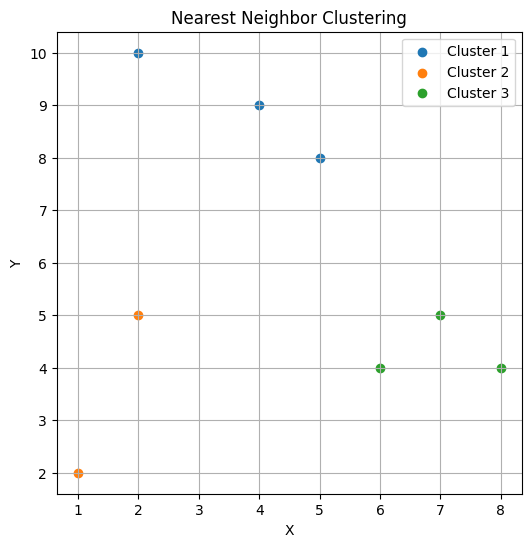

In [ ]:
def nearest_neighbor_clustering(data, threshold):
    clusters = []
    for point in data:
        assigned = False
        for cluster in clusters:
            d = distance(point, cluster['center'])
            if d < threshold:
                cluster['points'].append(point)
                assigned = True
                break
        if not assigned:
            clusters.append({'center': point, 'points': [point]})
    return clusters

start_time = time.time()
nn_clusters = nearest_neighbor_clustering(data, threshold=4)
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

plt.figure(figsize=(6, 6))
for i, cluster in enumerate(nn_clusters):
    points = np.array(cluster['points'])
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i+1}')
plt.title('Nearest Neighbor Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

I got the same results as using K-means, final plot is shown above

The performance of NN clustering would require more computation for larger datasets as the distance between data points for all pairs of coordinates would have to be calculated but for a smaller sample size would not be as time consuming. Also, the threshold can have a big impact on the results so the distance threshold should be chosen carefully to yield the highest accuracy.

Both nearest neighbor and k-means will have high accuracies if the clusters are properly defined and spaced out but for K-means the centroids need to be properly intialized for better efficiency and results. K-means requires less computation for larger datasets as the distance for each point is checked only with the center of the centroids so K-means will be a lot more efficient for a smaller amount of clusters.

Elapsed time: 0.0014388561248779297 seconds


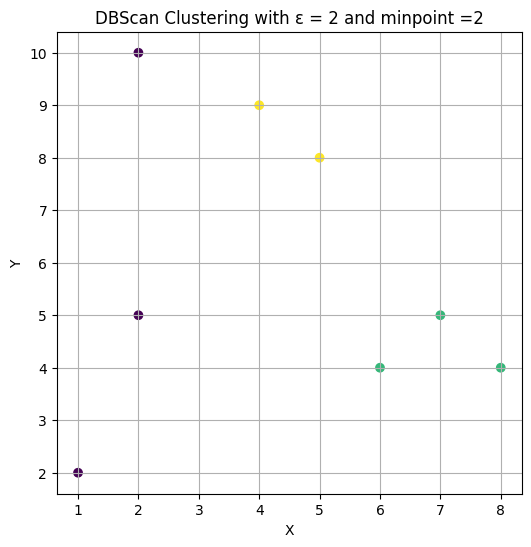

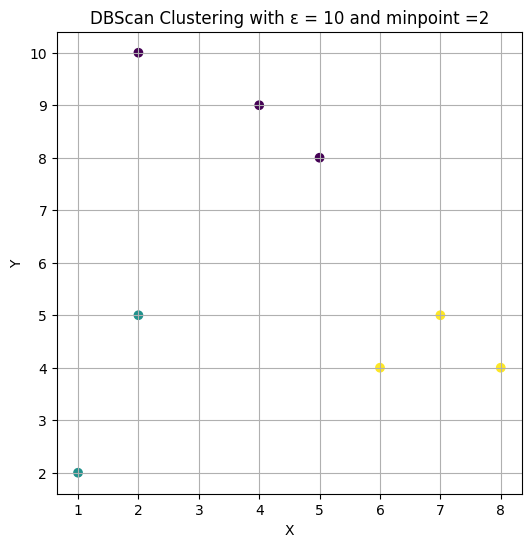

In [ ]:
import math

def region_query(data, point_index, epsilon):
    neighbors = []
    for i, point in enumerate(data):
        if distance(data[point_index], point) <= epsilon:
            neighbors.append(i)
    return neighbors

def expand_cluster(data, labels, point_index, cluster_id, epsilon, min_points):
    seeds = region_query(data, point_index, epsilon)
    if len(seeds) < min_points:
        labels[point_index] = -1
        return False
    else:
        labels[point_index] = cluster_id
        for seed_index in seeds:
            labels[seed_index] = cluster_id
        while len(seeds) > 0:
            current_point_index = seeds[0]
            results = region_query(data, current_point_index, epsilon)
            if len(results) >= min_points:
                for i in results:
                    if labels[i] == 0:
                        seeds.append(i)
                        labels[i] = cluster_id
                    elif labels[i] == -1:
                        labels[i] = cluster_id
            seeds = seeds[1:]
        return True

def dbscan(data, epsilon, min_points):
    cluster_id = 1
    n_points = len(data)
    labels = np.zeros(n_points)  # 0 for points not visited
    for i in range(n_points):
        if labels[i] == 0:
            if expand_cluster(data, labels, i, cluster_id, epsilon, min_points):
                cluster_id += 1
    return labels

epsilon = 2
min_points = 2

start_time = time.time()
labels_eps2 = dbscan(data, epsilon, min_points)
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

plt.figure(figsize=(6, 6))
plt.grid(True)
plt.scatter(data[:, 0], data[:, 1], c=labels_eps2, cmap='viridis')
plt.title('DBScan Clustering with ε = 2 and minpoint =2')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

epsilon = math.sqrt(10)
labels_eps10 = dbscan(data, epsilon, min_points)

plt.figure(figsize=(6, 6))
plt.grid(True)
plt.scatter(data[:, 0], data[:, 1], c=labels_eps10, cmap='viridis')
plt.title('DBScan Clustering with ε = 10 and minpoint =2')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



Final cluster plot for epsilon=2 shown first above having the (2,10) point mapped to a different cluster compared to K-means and nearest neighbor.

DBScan for epsilon = sqrt(10) shown above as well which has matching results to K-means and nearest neighbor.

In [ ]:
url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
data2 = pd.read_csv(url)
X = data2[['sbp', 'tobacco']].iloc[:300].values

def kmeans(data, k, epochs):
    centers = data[np.random.choice(range(len(data)), k, replace=False)]
    print(centers)
    for epoch in range(epochs):
        clusters = assign(data, centers)
        new_centers = update_centers(clusters)

        if np.array_equal(centers, new_centers):
            print(f"Convergence at {epoch + 1} epochs.")
            break

        centers = new_centers
    return centers, clusters

start_time = time.time()
centers, clusters = kmeans(X, k=2, epochs=100)
end_time = time.time()
elapsed_time = end_time - start_time
print("K-Means Elapsed time:", elapsed_time, "seconds")

print(centers)
print(clusters)

predicted_labels = np.zeros(len(X), dtype=int)
for i, point in enumerate(X):
    min_dist = float('inf')
    for j, center in enumerate(centers):
        dist = distance(point, center)
        if dist < min_dist:
            min_dist = dist
            predicted_labels[i] = j
print(predicted_labels)
# Extract true labels for testing data
true_labels = data2['chd'].iloc[:300]
print(true_labels)

# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels) * 100
print("Accuracy:", accuracy, "%")



[[136.    1.5]
 [156.    4. ]]
Convergence at 3 epochs.
K-Means Elapsed time: 0.017434358596801758 seconds
[[162.41891892   5.27621622]
 [127.09292035   3.12769912]]
{0: [array([160.,  12.]), array([170. ,   7.5]), array([206.,   6.]), array([146. ,  10.5]), array([158. ,   2.6]), array([150. ,   0.3]), array([145. ,   9.1]), array([146.,   0.]), array([158.  ,   1.02]), array([148. ,   5.5]), array([162. ,   7.4]), array([152. ,   0.9]), array([156.,   3.]), array([152.  ,   5.99]), array([152. ,  10.1]), array([168. ,   4.5]), array([148. ,   4.8]), array([148. ,  12.2]), array([194. ,   1.7]), array([164.,  12.]), array([1.66e+02, 7.00e-02]), array([158. ,   3.6]), array([170. ,   7.6]), array([168.,   9.]), array([174.,   0.]), array([154. ,   0.7]), array([150. ,   3.5]), array([153. ,   7.8]), array([148.  ,   4.04]), array([152.  ,  12.18]), array([158. ,  13.5]), array([160.,  14.]), array([148.,   6.]), array([174.  ,   9.45]), array([208. ,  27.4]), array([148.,   0.]), array

Accuracy of 39.0% was achieved for K-Means clustering however the result varies as random seeds are chosen at the the start of this algorithm everytime it is ran.

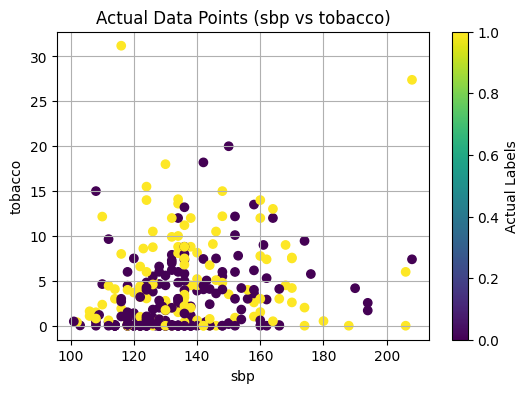

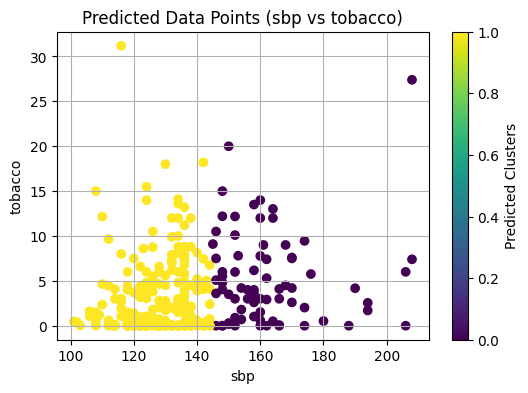

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=true_labels, cmap='viridis', marker='o')
plt.title('Actual Data Points (sbp vs tobacco)')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.colorbar(label='Actual Labels')
plt.grid(True)
plt.show()

# Plot 'sbp' vs 'tobacco' with predicted labels
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', marker='o')
plt.title('Predicted Data Points (sbp vs tobacco)')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.colorbar(label='Predicted Clusters')
plt.grid(True)
plt.show()

Plot of actual data points shown first above.
Plot of predicted data points also shown above.

In [ ]:
X_train = data2[['sbp', 'tobacco']].iloc[:300].values
X_test = data2[['sbp', 'tobacco']].iloc[300:].values

def nearest_neighbor_clustering(train_data, test_data):
    predicted_labels = []
    for test_point in test_data:
        min_distance = float('inf')
        predicted_label = None
        for i, train_point in enumerate(train_data):
            distance = np.linalg.norm(test_point - train_point)
            if distance < min_distance:
                min_distance = distance
                predicted_label = i
        predicted_labels.append(predicted_label)
    return predicted_labels

start_time = time.time()
predicted_indices = nearest_neighbor_clustering(X_train, X_test)
end_time = time.time()
elapsed_time = end_time - start_time
print("Nearest Neighbor Elapsed time:", elapsed_time, "seconds")

predicted_labels = [data2['chd'].iloc[i] for i in predicted_indices]
print(predicted_labels)

true_labels = data2['chd'].iloc[300:].values
print(true_labels)

accuracy = np.mean(predicted_labels == true_labels) * 100
print("Accuracy:", accuracy, "%")

Nearest Neighbor Elapsed time: 0.20825505256652832 seconds
[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1]
[0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1
 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 1 1 0 0 1 0 0 1]
Accuracy: 56.17283950617284 %


Accuracy of 56.173% was achieved for Nearest Neighbor (NN)

In [ ]:
X_train = data2[['sbp', 'tobacco']].iloc[:300].values
true_labels = data2['chd'].iloc[:300].values

epsilon = 2
min_points = 2

start_time = time.time()
predicted_labels = dbscan(X_train, epsilon, min_points)
end_time = time.time()
elapsed_time = end_time - start_time
print("DBScan Elapsed time:", elapsed_time, "seconds")

unique_labels = np.unique(predicted_labels)
cluster_mapping = {}
for i, label in enumerate(unique_labels):
    cluster_mapping[label] = i + 1
predicted_labels_mapped = [cluster_mapping[label] for label in predicted_labels]

accuracy = np.mean(predicted_labels_mapped == true_labels) * 100
print("Accuracy:", accuracy, "%")

DBScan Elapsed time: 0.7354142665863037 seconds
Accuracy: 7.666666666666666 %


Accuracy for DBScan with epsilion = sqrt(10) is 2.33% and 7.66% for epsilon = 2. In terms of accuracy for Dataset 2, Nearest Neighbor clustering had the highest accuracy of 56% followed by K-means, then DBScan having the worst accuracy meaning it is not a good choice for this model. In regards to performance the elapsed time for each algorithm is shown below:

Dataset 2

K-Means Elapsed time: 0.045271873474121094 seconds

Nearest Neighbor Elapsed time: 0.18344831466674805 seconds

DBScan Elapsed time: 0.6532275676727295 seconds

From these results it can be seen that K-means is the best performing algorithm for this large dataset then Nearest Neighbor followed by DBScan which supports my answer in Q11 with K-means having better scalability compared to nearest neighbor.


Below are the elapsed times for each of the algorithms in this lab for dataset 1:

Dataset 1

K-means 0.001657247543334961 seconds

Nearest Neighbor 0.0004949569702148438 seconds

DBScan 0.0008878707885742188 seconds

From these results we can see that with a much smaller dataset, Nearest Neighbor is the fastest followed by DBScan then finally K-means with the worst performance of 0.001657 seconds.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

X_train = data2[['sbp', 'tobacco']].iloc[:300].values

kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)
kmeans_predicted_labels = kmeans.labels_
kmeans_accuracy = np.mean(kmeans_predicted_labels == true_labels) * 100
print("K-Means Accuracy:", kmeans_accuracy)

nbrs = NearestNeighbors(n_neighbors=2, algorithm='brute', metric=distance).fit(X_train)
distances, indices = nbrs.kneighbors(X_train)
nn_predicted_labels = [1 if min(dist) < 4 else 0 for dist in distances]
nn_accuracy = np.mean(nn_predicted_labels == true_labels) * 100
print("Nearest Neighbor Accuracy:", nn_accuracy)

dbscan = DBSCAN(eps=2, min_samples=2, metric=distance).fit(X_train)
dbscan_predicted_labels = dbscan.labels_
# For DBSCAN, labels might contain noise (-1) so map labels accordingly
dbscan_predicted_labels_mapped = [0 if label == -1 else 1 for label in dbscan_predicted_labels]
dbscan_accuracy = np.mean(dbscan_predicted_labels_mapped == true_labels) * 100
print("DBSCAN Accuracy:", dbscan_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Accuracy: 61.33333333333333
Nearest Neighbor Accuracy: 36.666666666666664
DBSCAN Accuracy: 36.0


Here sklearn was used to verify my results and it can be seen that K-Means had the highest accuracy of 61.33% but this is probably due to the intial seeds being random at the start.

Nearest neighbor has an accuracy of 36.66% using a threshold of 4 which is a bit lower than my results and DBScan has a much higher accuracy of 36% compared to my implementation.

Overall, K-means and nearest neighbor still ended up having the 2 best accuracies with DBScan being the worst for this test set meaning it is not a good fit.